# Map generator (notebook for plotting CO2-diamond FTIR-data)
This is **Jupyter** notebook with embeded **Python (MatPlotLib + NumPy)** script. Script generates map images from csv-format matrices.
It is used to plot $CO_2$-diamonds FTIR-data. Script can work on any rectangular $n*m$ matrix. Different $n, m >0$ matrices can be used as an input. Before use check the OPTIONS module and edit path and destination if necessary.
---

OPTIONS: (Check and edit here)

In [ ]:
path ='/Users/meguka/Dropbox/CO2D-project-github/results/matrix/' #Path to load matrices
destination ='/Users/meguka/Dropbox/CO2D-project-github/results/maps/' #Path to export images
ExportImages = True #Set to True of False to enable/disable image export.

Check the python version: 


In [2]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


The code output above is to provide user information only.
3.7.6 (default, Jan  8 2020, 13:42:34) version was used to test the script.

Import required packages with aliases:

In [3]:
import numpy as np #Import numpy with np as alias
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec #used for creating figure cell layout
from matplotlib import cm
from pathlib import Path #used for creating an output directory if it doest not exist.
import os
import matplotlib.pylab as pylab #For pylab.rcParams.update(params)
params = {'axes.labelsize': 'large', #global settings for label size
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params) #load global settings for label size

Define function to create **NumPy** array from .csv-matrix:

In [4]:
def getmatrix(name, path): #Create NumPy array from csv matrix using filename and path arguments.
    f = open(path+name) #Load matrix from choosen path.
    d = f.readlines() #generates text file and stores each line of .csv file as a separate element in the list.
    f.close()
    array = [] #Create an empty array.
    for s in d: #for each line do:
        s = s.split(', ') #return a list of strings after breaking the line string by the ', ' separator.
        array.append(s) #write list of strings to array file.
    nparray = np.array(array, dtype='float') #Create a numpy array with numbers in floating point format.
    return nparray # return 2D NumPy array.

Define function to create mask and return masked data. It is used to hide 
datapoints if necessary:

In [5]:
def maskdata(name, datatomask): # Try to create mask using array and its "name" (to check if masking should be done for this dataset at all).
    mask = np.zeros(datatomask.shape, dtype=bool) #Create "False" n*m matrix. It is the mask of data_to_mask.shape. 
    if "FN7114" in name:
        pass
        #mask[0][14] = True #Mask the points. False corresponds to the unmasked points.
        #mask[17][14] = True
    if "FN7112" in name:
        pass
    maskedarray = ma.masked_array(datatomask, mask=mask) #Apply mask
    return maskedarray #Return masked array

Define function to plot the data. Fig - top level container for all plot elements. Axes are build in fig, they set coordinate system and contain most of the figure elements.

In [6]:
def plot(name, datatoplot, contour):
    
#COLORMAP    
    cmap = cm.viridis #Load base color map. For example plasma, magma, viridis.
    cmap.set_bad(color='white', alpha=None) #Modify colormap by changing set_bad color.
    
#GRIDSPEC  
    fig, ax = plt.subplots() #Create a figure
#     gs = fig.add_gridspec(1, 1, width_ratios=[10, 1]) #Create grid for the figure. 1 is rows, 2 is columns. 'width_ratios' sets width ratios of the subplots.
#     ax = fig.add_subplot(gs[0, 0]) #define ax as the axes on the first (left) gridspace
#     #ax1 = fig.add_subplot(gs[0, 1]) #define ax1 as the axes on the second (right) gridspace

#FIRST SUBPLOT
    #themap = ax.pcolor(datatoplot, cmap=cmap) #Create "themap" pcolor plot on ax with data from datatoplot. Cmap defines color scale.
    themap = ax.imshow(datatoplot, cmap=cmap, interpolation='gaussian', origin='lower') #Interpolate version
    clb = fig.colorbar(themap, ax=ax) #add colorbar


#CONTOUR
    if contour == True:
        from scipy.ndimage.filters import gaussian_filter
    exec(open("CO2D-SETTINGS-MAPGEN.py").read()) #read file containing options for individual plots. Must be in the same folder as this notebook.
#SECOND SUBPLOT
#     RevMatrix = ma.compressed(datatoplot) #Return array of unmasked values for histogram input.
#     Y,X = np.histogram(RevMatrix, bins=25, density=True) #Create numpy histogram with 25 bins.
#     x_span = X.max()-X.min() #Calculate X span
#     barcolors = [cmap(((x-X.min())/x_span)) for x in X] #Calculate colors based on colormap
#     thebar = ax1.barh(X[:-1],Y,color=barcolors,height=X[1]-X[0], left=0, log=True) #Make a horizontal bar plot on ax1. log=True makes distirbution log scale.
#     #Syntaxis: ax.bar(Sequence of scalars, height, color - scalar or array, width - scalar or array)
    
#     ax1.yaxis.set_label_position("right")
#     ax1.set_ylabel('Log distribution')
#     ax1.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False) #Disable ticks and labels for barh plot
#     plt.margins(y=0) #Remove white space before first bin and after lastbin
#     fig.subplots_adjust(hspace=0, wspace=0.05) #reduce distance between subplots

In [7]:
def save(name, destination, suffix): 
    if ExportImages == True: #If true — export
                subname = name.split(".")[0] #Takes string from filename up to "." symbol
                Path(destination).mkdir(parents=True, exist_ok=True) #create directory at destination if it does not exist. Uses pathlib
                plt.savefig(destination+subname+suffix+'.pdf', bbox_inches='tight', dpi=1000)#Save image. dpi=200 (dot per inch) sets resolution. bbox_inches = 'tight' makes images tightly cropped
                plt.savefig(destination+subname+suffix+'.png', bbox_inches='tight', dpi=1000)#Save image. dpi=200 (dot per inch) sets resolution. bbox_inches = 'tight' makes images tightly cropped
                plt.savefig(destination+subname+suffix+'.jpg', bbox_inches='tight', dpi=1000)#Save image. dpi=200 (dot per inch) sets resolution. bbox_inches = 'tight' makes images tightly cropped

We are ready to run the script. Code below lists all files in the path folder. For all .csv files found code executes getmatrix, masked, plot functions. Next plot is saved and closed.

Plot Taylor graph: %B = 4B/(2A + 4B)

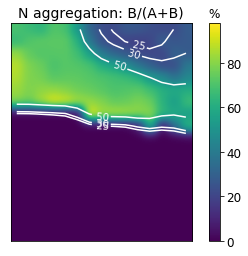

In [14]:
filelist = os.listdir(path) #List all files in the path 
plotname = ('B % map')
for name in filelist: #For each file in the path:
    if name.endswith('Acenter-MATRIX-height-FN7114 map truncated.csv'): #Load A-center file.
        dataA = getmatrix(name, path) #Get data with getmatrix function
for name in filelist: #For each file in the path:        
    if name.endswith('Bcenter-MATRIX-height-FN7114 map truncated.csv'): #Load B-center file.
        dataB = getmatrix(name, path) #Get data with getmatrix function
Nominator = (dataA+dataB)        
ResultMAtrix = np.divide(dataB*100, Nominator, where=Nominator!=0)

plot (plotname, ResultMAtrix, True)
save (plotname, destination, '')

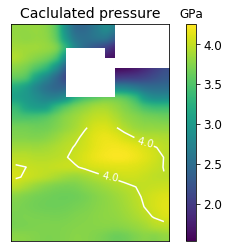

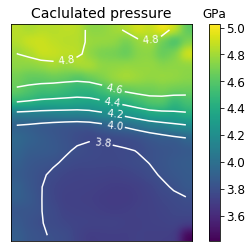

In [23]:
plotname = ('FN7112 map truncated Pressure')
filelist = os.listdir(path) #List all files in the path 
for name in filelist: #For each file in the path:
    if name.endswith('Voigt1-MATRIX-center-FN7112 map truncated.csv'): #Load A-center file.
        center7112 = getmatrix(name, path) #Get data with getmatrix function
for name in filelist: #For each file in the path:
    if name.endswith('Voigt-1+2-MATRIX-Area-FN7112 map truncated (from Origin).csv'): #Load A-center file.
        Area7112 = getmatrix(name, path) #Get data with getmatrix function
Pressure7112 = np.array(((((7.43**2+4*0.25*2345-4*0.25*center7112))**(1/2))-7.43)/(2*(-0.25))) #Calculate pressure
Pressure7112Edit= np.where(Area7112 > 0, Pressure7112, np.nan) #If Area of v3b is < 0 then plot 0, else plot pressure.
plot (plotname, Pressure7112Edit, True)
save (plotname, destination, '')

plotname = ('FN7114 map truncated Pressure')
for name in filelist: #For each file in the path:        
    if name.endswith('Voigt1-MATRIX-center-FN7114 map truncated.csv'): #Load B-center file.
        center7114 = getmatrix(name, path) #Get data with getmatrix function
for name in filelist: #For each file in the path:
    if name.endswith('Voigt-1+2-MATRIX-Area-FN7114 map truncated (from Origin).csv'): #Load A-center file.
        Area7114 = getmatrix(name, path) #Get data with getmatrix function
        
Pressure7114 = np.array(((((7.43**2+4*0.25*2345-4*0.25*center7114))**(1/2))-7.43)/(2*(-0.25))) #Calculate pressure
Pressure7114Edit= np.where(Area7114 > 0, Pressure7114, 0) #If Area of v3b is < 0 then plot 0, else plot pressure.
plot (plotname, Pressure7114Edit, True)
save (plotname, destination, '')

Voigt1-MATRIX-center-FN7112 map truncated.csv is found to contain (22, 16) array. Array is plotted below:


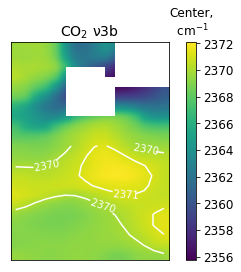

In [24]:
filelist = os.listdir(path) #List all files in the path 
for name in filelist: #For each file in the path:
    plotname = name
    if name.endswith('.csv'): #Load file if it ends with 'x'. Use '.csv' to load only .csv files.
        data = getmatrix(name, path) #Get data with getmatrix function
        if data.shape != (0,): #Use numpy array only if its size is not 0 then. Used to prevent error when file is empty.
            masked = maskdata(name, data) #Mask data with maskdata function
            if name.endswith('Voigt1-MATRIX-center-FN7112 map truncated.csv'): #Special mode for FN7112 center:
                masked = np.where(Area7112 > 0, maskdata(name, data), np.nan) #If Area of v3b is < 0 then plot 0, else plot pressure.
            print (name, 'is found to contain', data.shape, 'array. Array is plotted below:') #Print output to console.
            plot (name, masked, True) #Plot masked data
            save (name, destination, '')
        else: print (name, 'is found to contain', data.shape, 'array. Array is skipped!')